In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class NormalDistribution:
    def __init__(self, loc=0, width=1):
        self.loc = loc
        self.width = width
        self.norm = 1 / (width * np.sqrt(2 * np.pi))
        
    def __call__(self, x):
        return self.norm * np.exp(-0.5 * (x - self.loc)**2 / self.width**2)

In [31]:
def cross_entropy(pk, qk):
    """
    Calculate the cross entropy between two distributions.
    
    The cross entropy is defined as CE = -sum(pk * log(qk)). This function will 
    normalize pk and qk to 1 if needed.
    
    Parameters
    ----------
    pk : numpy.ndarray
        The discrete probability distribution.
    qk : numpy.ndarray
        The probability distribution against which to compute the cross entropy.
        
    Returns
    -------
    CE : float
        The cross entropy of the input distributions
    """
    if pk.shape != qk.shape:
        raise ValueError('Arrays pk and qk must have the same shape.')
    # Normalize distributions
    pk /= np.sum(pk)
    qk /= np.sum(qk)
    # Mask array 0s with smallest non-zero value
    qk[qk == 0] = np.min(qk[qk > 0])
    return -np.sum(pk * np.log(qk))

Same distribution, different sampling

In [32]:
dx1 = 0.1
x1 = np.arange(-5, 5, dx1)
dx2 = 0.01
x2 = np.arange(-5, 5, dx2)

nd = NormalDistribution(loc=0, width=1)
p1 = nd(x1)
p2 = nd(x2)

print(cross_entropy(p1, p1))
print(cross_entropy(p2, p2))

print(cross_entropy(p1*dx1, p1*dx1))
print(cross_entropy(p2*dx2, p2*dx2))

3.7215154710681055
6.024100710800965
3.7215154710681064
6.024100710800967


Different distribution widths

In [23]:
dx = 0.01
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=0, width=1)(x)
p2 = NormalDistribution(loc=0, width=0.1)(x)

print(cross_entropy(p1, p1))
print(cross_entropy(p2, p2))

6.024100710800965
3.72152362619874


In [114]:
def KL_divergence(pk, qk, dx):
    # mask zeroes with smallest non-zero value
    pk_nz = np.where(pk != 0, pk, np.min(pk[pk > 0]))
    qk_nz = np.where(qk != 0, qk, np.min(qk[qk > 0]))
    print(qk_nz)
    return np.sum(np.where(pk != 0, pk * (np.log(pk_nz) - np.log(qk_nz)) * dx, 0))

In [115]:
dx1 = 0.1
x1 = np.arange(-5, 5, dx1)
dx2 = 0.01
x2 = np.arange(-5, 5, dx2)

nd = NormalDistribution(loc=0, width=1)
p1 = nd(x1)
p2 = nd(x2)

print(KL_divergence(p1, p1, dx1))
print(KL_divergence(p2, p2, dx2))

[1.48671951e-06 2.43896075e-06 3.96129909e-06 6.36982518e-06
 1.01408521e-05 1.59837411e-05 2.49424713e-05 3.85351967e-05
 5.89430678e-05 8.92616572e-05 1.33830226e-04 1.98655471e-04
 2.91946926e-04 4.24780271e-04 6.11901930e-04 8.72682695e-04
 1.23221917e-03 1.72256894e-03 2.38408820e-03 3.26681906e-03
 4.43184841e-03 5.95253242e-03 7.91545158e-03 1.04209348e-02
 1.35829692e-02 1.75283005e-02 2.23945303e-02 2.83270377e-02
 3.54745928e-02 4.39835960e-02 5.39909665e-02 6.56158148e-02
 7.89501583e-02 9.40490774e-02 1.10920835e-01 1.29517596e-01
 1.49727466e-01 1.71368592e-01 1.94186055e-01 2.17852177e-01
 2.41970725e-01 2.66085250e-01 2.89691553e-01 3.12253933e-01
 3.33224603e-01 3.52065327e-01 3.68270140e-01 3.81387815e-01
 3.91042694e-01 3.96952547e-01 3.98942280e-01 3.96952547e-01
 3.91042694e-01 3.81387815e-01 3.68270140e-01 3.52065327e-01
 3.33224603e-01 3.12253933e-01 2.89691553e-01 2.66085250e-01
 2.41970725e-01 2.17852177e-01 1.94186055e-01 1.71368592e-01
 1.49727466e-01 1.295175

In [119]:
dx = 0.01
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=0, width=1)(x)
p2 = NormalDistribution(loc=0, width=0.1)(x)

print(KL_divergence(p1, p1, dx))
print(KL_divergence(p2, p2, dx))
print(KL_divergence(p1, p2, dx))

[1.48671951e-06 1.56286711e-06 1.64275059e-06 1.72654452e-06
 1.81443119e-06 1.90660090e-06 2.00325233e-06 2.10459284e-06
 2.21083887e-06 2.32221628e-06 2.43896075e-06 2.56131814e-06
 2.68954497e-06 2.82390880e-06 2.96468867e-06 3.11217558e-06
 3.26667296e-06 3.42849718e-06 3.59797801e-06 3.77545923e-06
 3.96129909e-06 4.15587096e-06 4.35956388e-06 4.57278315e-06
 4.79595102e-06 5.02950729e-06 5.27391001e-06 5.52963619e-06
 5.79718251e-06 6.07706607e-06 6.36982518e-06 6.67602015e-06
 6.99623414e-06 7.33107399e-06 7.68117112e-06 8.04718246e-06
 8.42979138e-06 8.82970870e-06 9.24767367e-06 9.68445502e-06
 1.01408521e-05 1.06176958e-05 1.11158501e-05 1.16362128e-05
 1.21797170e-05 1.27473324e-05 1.33400665e-05 1.39589660e-05
 1.46051181e-05 1.52796522e-05 1.59837411e-05 1.67186026e-05
 1.74855010e-05 1.82857492e-05 1.91207097e-05 1.99917967e-05
 2.09004779e-05 2.18482762e-05 2.28367716e-05 2.38676032e-05
 2.49424713e-05 2.60631392e-05 2.72314356e-05 2.84492564e-05
 2.97185677e-05 3.104140

In [86]:
dx = 0.1
x = np.arange(-10, 10, dx)
p1 = NormalDistribution(loc=0, width=1)(x)
p2 = NormalDistribution(loc=1, width=1)(x)

print(KL_divergence(p1, p2, dx))

0.5000000000000018


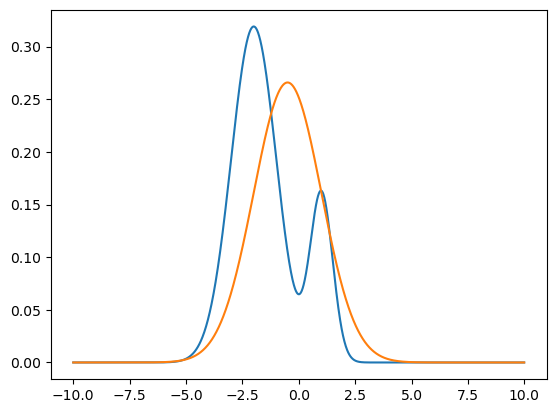

0.2899637949321237


In [94]:
dx = 0.01
x = np.arange(-10, 10, dx)

p1 = 0.8 * NormalDistribution(loc=-2, width=1)(x) + 0.2 * NormalDistribution(loc=1, width=0.5)(x)
p2 = NormalDistribution(loc=-0.5, width=1.5)(x)

plt.plot(x, p1)
plt.plot(x, p2)
plt.show()

print(KL_divergence(p1, p2, dx))

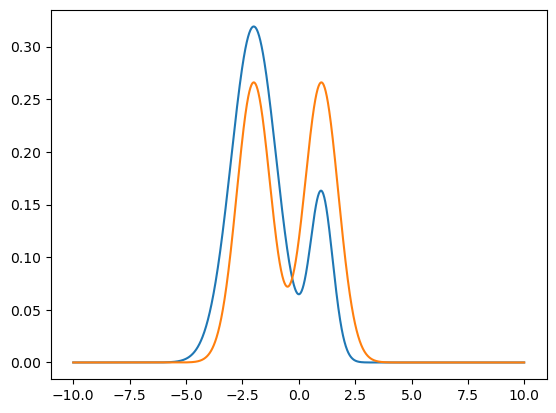

0.19656470817372215


In [93]:
dx = 0.01
x = np.arange(-10, 10, dx)

p1 = 0.8 * NormalDistribution(loc=-2, width=1)(x) + 0.2 * NormalDistribution(loc=1, width=0.5)(x)
p2 = 0.5 * NormalDistribution(loc=-2, width=0.75)(x) + 0.5 * NormalDistribution(loc=1, width=0.75)(x)

plt.plot(x, p1)
plt.plot(x, p2)
plt.show()

print(KL_divergence(p1, p2, dx))

In [132]:
def kl_divergence(pk, qk, dx):
    print(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
    return np.sum(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))

In [133]:
dx = 0.1
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=0, width=1)(x)
p2 = NormalDistribution(loc=0, width=0.1)(x)

print(kl_divergence(p1, p2, dx))

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02080056  0.02868764  0.03911384  0.05271635  0.07022632  0.0924593
  0.12029571  0.15464874  0.19641838  0.24643033  0.30536024  0.37364513
  0.45138572  0.53824576  0.63335632  0.73523511  0.84173197  0.95001231
  1.05658926  1.1574132   1.24802369  1.32376348  1.38004835  1.41267969
  1.41817985  1.39412488  1.33944521  1.2546633   1.14203927  1.00560042
  0.85103889  0.68547279  0.51707844  0.3546148   0.20687262  0.08209048
 -0.01261445 -0.07175255 -0.09185985 -0.07175255 -0.01261445  0.08209048
  0.20687262  0.3546148   0.51707844  0.68547279  0.85103889  1.00560042
  1.14203927  1.2546633   1.33944521  1.39412488  1.41817985  1.41267969
  1.38004835  1.32376348  1.24802369  1.1574132   1.05658926  0.95001231
  0.84173197  0.73523511  0.63335632  0.53824576  0.45138572  0.37364513
  0.30536024  0.24643033  0.19641838  0.15464874  0.12029571  0.0924

C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))


In [136]:
dx = 0.1
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=-1, width=0.1)(x)
p2 = NormalDistribution(loc=1, width=0.1)(x)

print(kl_divergence(p1, p2, dx))

[ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  9.84899744e-069  3.78225835e-061
  5.33604798e-054  2.76535477e-047  5.26371149e-041  3.67946077e-035
  9.44408844e-030  8.89904086e-025  3.07783945e-020  3.90631396e-016
  1.81881759e-012  3.10580494e-009  1.94428251e-006  4.46015854e-004
  3.74724632e-002  1.15228059e+000  1.29578320e+001  5.32335594e+001
  7.97884561e+001  4.35547304e+001  8.63855464e+000  6.20458778e-001
  1.60596271e-002  1.48671951e-004  4.86070628e-007  5.48083225e-010
  2.02090843e-013  2.05595471e-017  2.73367058e-034 -4.23763851e-026
 -8.58553494e-031 -4.79929665e-036 -8.77285248e-042 -5.53070955e-048
 -1.23139569e-054 -9.80585499e-062

C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:2: RuntimeWarning: divide by zero encountered in log
  print(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:2: RuntimeWarning: invalid value encountered in subtract
  print(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:2: RuntimeWarning: invalid value encountered in multiply
  print(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where((qk != 0) & (pk != 0), pk * (np.log(pk) - np.log(qk)) * dx, 0))
C:\Users\dubay.11\AppData\Local\Temp\1\ipykernel_21104\1008559417.py:3: RuntimeWarning: invalid value encountered in subtract
  return np.sum(np.where((qk != 0) & (pk != 0)

In [141]:
def kl_divergence(pk, qk, dx):
    # mask zeroes with smallest non-zero value
    pk_nz = np.where(pk != 0, pk, np.min(pk[pk > 0]))
    qk_nz = np.where(qk != 0, qk, np.min(qk[qk > 0]))
    print(pk_nz * (np.log(pk_nz) - np.log(qk_nz)) * dx)
    return np.sum(pk_nz * (np.log(pk_nz) - np.log(qk_nz)) * dx)

In [142]:
dx = 0.1
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=0, width=1)(x)
p2 = NormalDistribution(loc=0, width=0.1)(x)

print(kl_divergence(p1, p2, dx))

[ 1.05140420e-04  1.72603402e-04  2.80530255e-04  4.51399200e-04
  7.19105480e-04  1.13416218e-03  1.77095890e-03  2.73774236e-03
  4.19012956e-03  6.34911397e-03  9.52466257e-03  1.41461054e-02
  2.08005591e-02  2.86876382e-02  3.91138370e-02  5.27163543e-02
  7.02263163e-02  9.24593038e-02  1.20295706e-01  1.54648736e-01
  1.96418376e-01  2.46430327e-01  3.05360245e-01  3.73645134e-01
  4.51385722e-01  5.38245756e-01  6.33356317e-01  7.35235105e-01
  8.41731969e-01  9.50012311e-01  1.05658926e+00  1.15741320e+00
  1.24802369e+00  1.32376348e+00  1.38004835e+00  1.41267969e+00
  1.41817985e+00  1.39412488e+00  1.33944521e+00  1.25466330e+00
  1.14203927e+00  1.00560042e+00  8.51038894e-01  6.85472790e-01
  5.17078442e-01  3.54614805e-01  2.06872618e-01  8.20904819e-02
 -1.26144544e-02 -7.17525507e-02 -9.18598548e-02 -7.17525507e-02
 -1.26144544e-02  8.20904819e-02  2.06872618e-01  3.54614805e-01
  5.17078442e-01  6.85472790e-01  8.51038894e-01  1.00560042e+00
  1.14203927e+00  1.25466

In [146]:
dx = 0.1
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=-1, width=0.1)(x)
p2 = NormalDistribution(loc=1, width=0.1)(x)

print(kl_divergence(p1, p2, dx))

[ 0.00000000e+000  0.00000000e+000  0.00000000e+000  7.95002457e-297
  1.11510949e-280  4.31473392e-265  5.45835802e-250  2.38101991e-235
  3.66736914e-221  2.01989431e-207  4.00831749e-194  2.87983590e-181
  7.51600568e-169  7.14245410e-157  2.47574783e-145  3.13428423e-134
  1.45073807e-123  2.45703137e-113  1.52365515e-103  3.46136775e-094
  2.88193505e-085  8.79740414e-077  9.84899744e-069  3.78225835e-061
  5.33604798e-054  2.76535477e-047  5.26371149e-041  3.67946077e-035
  9.44408844e-030  8.89904086e-025  3.07783945e-020  3.90631396e-016
  1.81881759e-012  3.10580494e-009  1.94428251e-006  4.46015854e-004
  3.74724632e-002  1.15228059e+000  1.29578320e+001  5.32335594e+001
  7.97884561e+001  4.35547304e+001  8.63855464e+000  6.20458778e-001
  1.60596271e-002  1.48671951e-004  4.86070628e-007  5.48083225e-010
  2.02090843e-013  2.05595471e-017  2.73367058e-034 -4.23763851e-026
 -8.58553494e-031 -4.79929665e-036 -8.77285248e-042 -5.53070955e-048
 -1.23139569e-054 -9.80585499e-062

In [147]:
dx = 0.1
x = np.arange(-5, 5, dx)
p1 = NormalDistribution(loc=-2, width=0.1)(x)
p2 = NormalDistribution(loc=2, width=0.1)(x)

print(kl_divergence(p1, p2, dx))

[ 4.00831749e-194  2.87983590e-181  7.51600568e-169  7.14245410e-157
  2.47574783e-145  3.13428423e-134  1.45073807e-123  2.45703137e-113
  1.52365515e-103  3.46136775e-094  2.88193505e-085  8.79740414e-077
  9.84899744e-069  4.04491518e-061  6.09540865e-054  3.37096747e-047
  6.84282493e-041  5.09925270e-035  1.39514943e-029  1.40159894e-024
  5.17077028e-020  7.00566569e-016  3.48606705e-012  6.37146748e-009
  4.27742153e-006  1.05482750e-003  9.55547812e-002  3.17985124e+000
  3.88734959e+001  1.74581878e+002  2.88036326e+002  1.74581878e+002
  3.88734959e+001  3.01365692e+000  8.56513445e-002  8.92031709e-004
  3.40249440e-006  4.75005461e-009  2.42509012e-012  4.52310037e-016
  3.07783945e-020  7.62774931e-025  6.86842795e-030  2.23967177e-035
  2.63185574e-041  1.10614191e-047  1.64186092e-054  8.40501856e-062
  1.40699963e-069  6.49854415e-078  3.92286975e-099 -2.76081177e-095
 -2.53942524e-104 -6.44467244e-114 -5.34834311e-124 -1.53078595e-134
 -1.54734239e-145 -5.59408993e-157